Prova Finale Roberto Grassia
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import os
import dotenv
import sqlalchemy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
urlcovid = r"C:\Users\rgras\Desktop\Python\Prova_finale.csv"
covid = pd.read_csv(urlcovid)

1.Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [2]:
covid.info() #Visualizzo le informazioni del dataframe e metadati

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [3]:
print("La Dimensione del dataframe è:",covid.shape) #Visualizzo la dimensione del dataframe

La Dimensione del dataframe è: (429435, 67)


In [4]:
covid.sample(10) #Visualizzo 15 righe casuali del dataframe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
146060,GRC,Europe,Greece,2021-09-23,637799.0,0.0,2188.286,14509.0,0.0,38.429,...,52.0,NaN,4.210,82.24,0.888,10384972,NaN,NaN,NaN,NaN
274233,NGA,Africa,Nigeria,2021-02-04,130557.0,0.0,1422.143,1578.0,0.0,11.857,...,10.8,41.949,NaN,54.69,0.539,218541216,NaN,NaN,NaN,NaN
312816,REU,Africa,Reunion,2020-03-26,47.0,0.0,4.857,0.0,0.0,0.000,...,NaN,NaN,NaN,80.48,NaN,974062,NaN,NaN,NaN,NaN
252536,MNE,Europe,Montenegro,2021-04-17,92674.0,0.0,239.429,1262.0,0.0,9.714,...,47.9,NaN,3.861,76.88,0.829,627082,NaN,NaN,NaN,NaN
132139,GUF,South America,French Guiana,2020-04-12,86.0,24.0,3.429,0.0,0.0,0.000,...,NaN,NaN,NaN,79.95,NaN,304568,-51.399998,-17.46,-43.4,-176.64565
201076,KWT,Asia,Kuwait,2022-01-06,417723.0,0.0,401.714,2468.0,0.0,0.000,...,37.0,NaN,2.000,75.49,0.806,4268886,NaN,NaN,NaN,NaN
238927,MRT,Africa,Mauritania,2020-09-16,7274.0,0.0,20.000,308.0,0.0,0.143,...,NaN,15.950,NaN,64.92,0.546,4736146,NaN,NaN,NaN,NaN
237773,MTQ,North America,Martinique,2022-02-18,105097.0,0.0,1211.143,857.0,0.0,2.143,...,NaN,NaN,NaN,82.54,NaN,367512,NaN,NaN,NaN,NaN
421452,WLF,Oceania,Wallis and Futuna,2021-02-06,5.0,0.0,0.143,0.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
39250,BEN,Africa,Benin,2022-01-08,25044.0,0.0,15.571,161.0,0.0,0.000,...,12.3,11.035,0.500,61.77,0.545,13352864,NaN,NaN,NaN,NaN


In [5]:
covid.describe() #Visualizzo le statistiche del dataframe

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [6]:
covid.isnull().sum() #Visualizzo i valori nulli del dataframe

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [7]:
covid[covid["continent"].isnull()] #Visualizzo i valori nulli della colonna continent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424408,OWID_WRL,NaN,World,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424409,OWID_WRL,NaN,World,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424410,OWID_WRL,NaN,World,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
424411,OWID_WRL,NaN,World,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN


2.Si chiede di trovare, per ogni continente: 

2a. il numero di casi fin dall'inizio della pandemia

In [8]:
Numero_casi_continente = covid.groupby(["continent"])["new_cases"].sum().sort_values(ascending=False) #Calcolo il numero totale di casi per continente
print(Numero_casi_continente)

continent
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
South America     68811012.0
Oceania           15003468.0
Africa            13146831.0
Name: new_cases, dtype: float64


2b. la percentuale rispetto al totale mondiale del numero di casi

In [9]:
Mondo = covid['location'] == 'World' #Filtro il dataframe per la colonna location uguale a World
dati_mondiali = covid[Mondo] #Creo un nuovo dataframe con i dati mondiali
Totale_mondiale = dati_mondiali['new_cases'].sum() #Calcolo il totale mondiale dei casi
print("Il Totale Mondiale è:",Totale_mondiale)
Percentuale_mondiali = (Numero_casi_continente/Totale_mondiale)*100 #Calcolo la percentuale dei casi per continente rispetto al totale mondiale
print(Percentuale_mondiali)

Il Totale Mondiale è: 775935057.0
continent
Asia             38.864616
Europe           32.595108
North America    16.044216
South America     8.868141
Oceania           1.933598
Africa            1.694321
Name: new_cases, dtype: float64


3.Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 

In [10]:
covid["date"] = pd.to_datetime(covid["date"]) #Converto la colonna "date" in formato datetime

In [11]:
filtro_italia2022 = covid[(covid["location"] == "Italy") & (covid["date"].dt.year == 2022)]  # Filtro il dataframe per l'Italia nel 2022

In [12]:
filtro_italia2022.isnull().sum() #Controllo i valori nulli nel dataframe filtrato

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       313
excess_mortality_cumulative                313
excess_mortality                           313
excess_mortality_cumulative_per_million    313
Length: 67, dtype: int64

In [13]:
filtro_italia2022.isnull().sum().sum() #Controllo i valori nulli nel dataframe filtrato

3345

In [14]:
print(filtro_italia2022.loc[filtro_italia2022["new_cases"].isnull(), ["new_cases"]]) #Visualizzo le righe con valori nulli in new_cases
print(filtro_italia2022.loc[filtro_italia2022["total_cases"].isnull(), ["total_cases"]]) #Visualizzo le righe con valori nulli in total_cases

Empty DataFrame
Columns: [new_cases]
Index: []
Empty DataFrame
Columns: [total_cases]
Index: []


In [15]:
print(filtro_italia2022.loc[filtro_italia2022["new_cases"] == 0, ["new_cases"]]) #Visualizzo le righe dove new_cases è 0
print(filtro_italia2022.loc[filtro_italia2022["total_cases"] == 0, ["total_cases"]]) #Visualizzo le righe dove total_cases è 0

        new_cases
186002        0.0
186004        0.0
186005        0.0
186006        0.0
186007        0.0
...           ...
186362        0.0
186363        0.0
186364        0.0
186365        0.0
186366        0.0

[313 rows x 1 columns]
Empty DataFrame
Columns: [total_cases]
Index: []


In [16]:
filtro_italia2022 = filtro_italia2022[
    (filtro_italia2022["new_cases"] != 0) & 
    (filtro_italia2022["total_cases"] != 0)] # Rimuovo le righe con new_cases o total_cases uguali a 0

In [17]:
print(filtro_italia2022.loc[filtro_italia2022["new_cases"] == 0, ["new_cases"]]) #Controllo se gli 0 sono stati rimossi
print(filtro_italia2022.loc[filtro_italia2022["total_cases"] == 0, ["total_cases"]])

Empty DataFrame
Columns: [new_cases]
Index: []
Empty DataFrame
Columns: [total_cases]
Index: []


In [18]:
covid_italia2022_totali = filtro_italia2022[["date", "total_cases"]]  # Seleziono le colonne desiderate

3a. L'evoluzione del casi totali dall'inizio alla fine dell'anno

In [19]:
covid_italia2022_totali.sample(5).sort_values(by="total_cases")

,date,total_cases
186129,2022-05-08,16767773.0
186171,2022-06-19,17844905.0
186213,2022-07-31,21002773.0
186227,2022-08-14,21480076.0
186241,2022-08-28,21788862.0


<Axes: title={'center': 'Casi totali in Italia nel 2022'}, xlabel='date'>

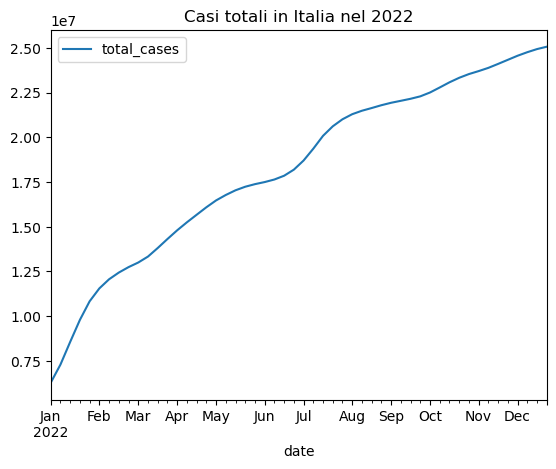

In [20]:
covid_italia2022_totali.plot(x="date", y="total_cases", title="Casi totali in Italia nel 2022", kind = "line")

3b. Il numero di nuovi casi rispetto alla data

In [21]:
covid_italia2022_nuovi = filtro_italia2022[["date", "new_cases"]]  #Seleziono le colonne desiderate

In [22]:
covid_italia2022_nuovi.sample(5).sort_values(by="date")

,date,new_cases
186003,2022-01-02,644604.0
186101,2022-04-10,447322.0
186129,2022-05-08,304573.0
186150,2022-05-29,144478.0
186353,2022-12-18,174187.0


<Axes: title={'center': 'Nuovi casi in Italia nel 2022'}, xlabel='date'>

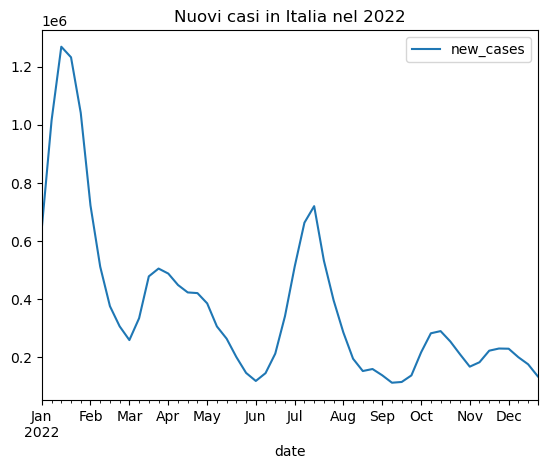

In [23]:
covid_italia2022_nuovi.plot(x="date", y="new_cases", title="Nuovi casi in Italia nel 2022", kind = "line")

4.Riguardo le nazioni di Italia, Germania e Francia tra Maggio 2022 e Aprile 2023

In [24]:
covid_paesi_22_23 = covid[covid["date"].between("2022-05-01", "2023-04-30")] # Filtro il dataframe per il periodo desiderato
covid_paesi_22_23 = covid_paesi_22_23[covid_paesi_22_23["location"].isin(["Italy", "Germany", "France"])]  # Filtro il dataframe per i paesi desiderati

In [25]:
covid_paesi_22_23.isna().sum() #Controllo se ci sono valori nulli nel dataframe

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       936
excess_mortality_cumulative                936
excess_mortality                           936
excess_mortality_cumulative_per_million    936
Length: 67, dtype: int64

In [26]:
covid_paesi_22_23.isnull().sum().sum() #Controllo la quantità di valori nulli nel dataframe

16332

In [27]:
covid_paesi_22_23["icu_patients"].isnull().sum() #Controllo i valori nulli nella colonna "icu_patients"

30

In [28]:
covid_paesi_22_23 = covid_paesi_22_23[covid_paesi_22_23["icu_patients"].notna()] #Rimuovo le righe con valori nulli nella colonna "icu_patients"
covid_paesi_22_23 = covid_paesi_22_23[(covid_paesi_22_23["icu_patients"] > 0)]

In [29]:
covid_paesi_22_23["icu_patients"].isnull().sum() #Controllo i valori nulli nella colonna "icu_patients"

0

In [30]:
covid_paesi_22_23.isnull().sum().sum() #Controllo la quantità di valori nulli nel dataframe

15602

4a. Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

Text(0.5, 1.0, 'Numero di pazienti in terapia intensiva per paese')

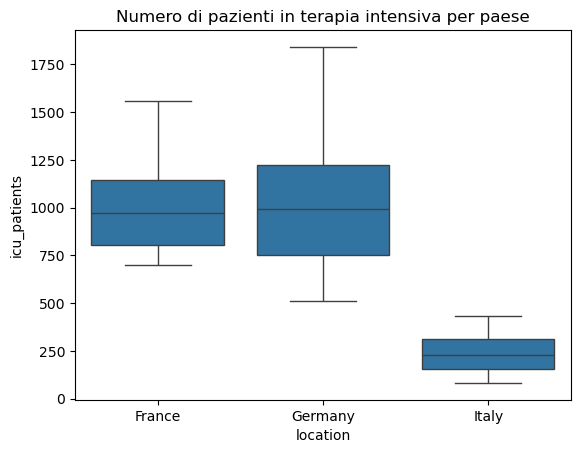

In [31]:
sns.boxplot(data=covid_paesi_22_23, x="location", y="icu_patients") # Visualizzo i dati con un boxplot
plt.title("Numero di pazienti in terapia intensiva per paese") # Aggiungo un titolo al grafico

4b. Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

Dal grafico che la Germania ha avuto un indice maggiore di Icu seguita da Francia e Italia. Osserviamo il box che va dal 1° quartile e 3° quartile(25% a 75%):
       Germania:Tra 750 e 1250 con baffo superiore di 1750; Francia:750 e 1200 con baffo superiore di 1500;
       Italia:Tra 150 e 350 con baffo superiore leggermente al di sotto 500

5.Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:

In [32]:
covid_paesi_21 = covid[covid["date"].dt.year == 2021]  # Filtro il dataframe per il periodo desiderato
covid_paesi_21 = covid_paesi_21[covid_paesi_21["location"].isin(["Italy", "Germany", "France", "Spain"])]  # Filtro il dataframe per i paesi desiderati

5a Mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospedalizzati per ognuna colonna (colonna hosp_patients)

In [33]:
covid_paesi_21_hosp = covid_paesi_21.groupby(["location"])["hosp_patients"].sum() # Calcolo il numero totale di pazienti in ospedale per paese
print(covid_paesi_21_hosp)

location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


Text(0.5, 1.0, 'Numero totale di pazienti in ospedale per paese')

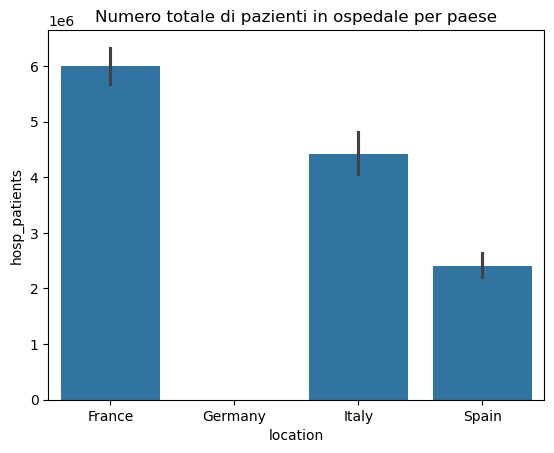

In [34]:
sns.barplot(data=covid_paesi_21, x="location", y="hosp_patients", estimator=sum) # Visualizzo i dati con un barplot
plt.title("Numero totale di pazienti in ospedale per paese") # Aggiungo un titolo al grafico

5b. Se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [35]:
covid_germany = covid_paesi_21[covid_paesi_21["location"] == "Germany"] # Filtro per controllo dati Germania per verifcare lo 0 precedente
covid_germany["hosp_patients"].isna().sum() #Controllo se ci sono valori nulli nel dataframe

365

In [36]:
print(covid_germany[["date", "hosp_patients"]].sample(20)) # Verfica random di 20 righe per Germania

             date  hosp_patients
140982 2021-07-29            NaN
140898 2021-05-06            NaN
140822 2021-02-19            NaN
140852 2021-03-21            NaN
140775 2021-01-03            NaN
140907 2021-05-15            NaN
141021 2021-09-06            NaN
141050 2021-10-05            NaN
140835 2021-03-04            NaN
140890 2021-04-28            NaN
140837 2021-03-06            NaN
141028 2021-09-13            NaN
140954 2021-07-01            NaN
140800 2021-01-28            NaN
141113 2021-12-07            NaN
141013 2021-08-29            NaN
141133 2021-12-27            NaN
140783 2021-01-11            NaN
141069 2021-10-24            NaN
140813 2021-02-10            NaN
